In [2]:
import sys
import os
from dotenv import load_dotenv

load_dotenv()
work_dir = os.getenv('WORK_DIR')

sys.path.append(work_dir)

print('Workdir: ', work_dir)

Workdir:  /Users/carol/Documents/etl/workshop-02


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('../data/spotify_dataset.csv',sep=',', encoding='utf-8')

El dataset Spotify tiene 114000 filas y 21 columnas.

In [4]:
df.shape

(114000, 21)

Las columnas que nos dan inicialmente son:


**Columnas del Dataset:**

1. **Unnamed: 0**: 
   - Índice o identificador de fila.

2. **track_id**: 
   - ID de Spotify para la pista.

3. **artists**: 
   - Nombres de los artistas que interpretan la pista. Si hay más de un artista, están separados por `;`.

4. **album_name**: 
   - Nombre del álbum en el que aparece la pista.

5. **track_name**: 
   - Nombre de la pista.

6. **popularity**: 
   - Popularidad de la pista (de 0 a 100), calculada en base al número total de reproducciones y su recencia.

7. **duration_ms**: 
   - Duración de la pista en milisegundos.

8. **explicit**: 
   - Indica si la pista tiene letras explícitas (`true` o `false`).

9. **danceability**: 
   - Medida de cuán adecuada es la pista para bailar (de 0.0 a 1.0), basada en elementos musicales como el tempo, estabilidad del ritmo y fuerza del golpe.

10. **energy**: 
    - Medida de intensidad y actividad de la pista (de 0.0 a 1.0). Las pistas más energéticas se sienten rápidas, fuertes y ruidosas.

11. **key**: 
    - Tonalidad de la pista utilizando la notación de Clase de Tonos (0 = C, 1 = C♯/D♭, 2 = D, etc.). Si no se detecta clave, el valor es -1.

12. **loudness**: 
    - Volumen general de la pista en decibelios (dB).

13. **mode**: 
    - Modalidad de la pista (1 para mayor, 0 para menor).

14. **speechiness**: 
    - Medida de la presencia de palabras habladas en la pista (de 0.0 a 1.0). Valores altos indican grabaciones de palabras habladas, mientras que valores bajos representan música y otros contenidos no verbales.

15. **acousticness**: 
    - Medida de la certeza de que la pista es acústica (de 0.0 a 1.0). Valores cercanos a 1.0 indican alta probabilidad de que la pista sea acústica.

16. **instrumentalness**: 
    - Predicción de si la pista contiene vocales (de 0.0 a 1.0). Valores cercanos a 1.0 sugieren que la pista no tiene contenido vocal.

17. **liveness**: 
    - Medida de la presencia de una audiencia en la grabación (de 0.0 a 1.0). Valores altos indican una alta probabilidad de que la pista haya sido interpretada en vivo.

18. **valence**: 
    - Medida de la positividad musical transmitida por la pista (de 0.0 a 1.0). Las pistas con alta valencia suenan más positivas, mientras que las de baja valencia suenan más negativas.

19. **tempo**: 
    - Tempo estimado de la pista en pulsaciones por minuto (BPM).

20. **time_signature**: 
    - Firma de tiempo estimada (de 3 a 7), indicando el número de tiempos en cada compás.

21. **track_genre**: 
    - Género de la pista.

In [5]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

Este es un vistazo inicial de nuestro dataset:

In [8]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


No hay duplicados

In [9]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape[0])

number of duplicate rows:  0


## Data Missing

Hay valores nulos, hay 1 tanto en artists como en album_name y track_name

In [10]:
missing_data = df.isna().sum()
missing_data

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Si observamos, estos valores nulos están en un solo registro. Estas 3 columnas son importantes para reconocer qué canción es, pero como no sabemos, podemos dropearla.

In [11]:
nan_records = df[df.isna().any(axis=1)]
nan_records

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [12]:
nan_record_index = df[df.isna().any(axis=1)].index
df.drop(nan_record_index, inplace=True)

## Data Type:

### Datos Cuantitativos
Valores numéricos que se pueden medir y analizar estadísticamente.
- **Unnamed: 0**: int64
- **popularity**: int64
- **duration_ms**: int64
- **danceability**: float64
- **energy**: float64
- **key**: int64
- **loudness**: float64
- **mode**: int64
- **speechiness**: float64
- **acousticness**: float64
- **instrumentalness**: float64
- **liveness**: float64
- **valence**: float64
- **tempo**: float64
- **time_signature**: int64

### Datos Cualitativos
Datos descriptivos que representan categorías o características.
- **track_id**: object
- **artists**: object
- **album_name**: object
- **track_name**: object
- **explicit**: bool
- **track_genre**: object

In [14]:
df.dtypes

Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

Aseguremonos que las cadenas de texto estén en el mismo formato

In [25]:
df['artists'] = df['artists'].str.title().str.strip()
df['album_name'] = df['album_name'].str.title().str.strip()
df['track_name'] = df['track_name'].str.title().str.strip()
df['track_genre'] = df['track_genre'].str.title().str.strip()

## Data Distribution

I've decided to remove the ID for now for some of the charts/tables; we'll regenerate it later.

In [16]:
df = df.drop(columns=['Unnamed: 0'])

In [27]:
statisticians = df.describe().T
statisticians['median'] = df.select_dtypes("number").median()
statisticians = statisticians.iloc[:,[0,1,8,2,3,4,5,6,7]]
np.round(statisticians,2)

,count,mean,median,std,min,25%,50%,75%,max
popularity,114000.0,33.24,35.00,22.31,0.00,17.00,35.00,50.00,100.00
duration_ms,114000.0,228029.15,212906.00,107297.71,0.00,174066.00,212906.00,261506.00,5237295.00
danceability,114000.0,0.57,0.58,0.17,0.00,0.46,0.58,0.70,0.98
energy,114000.0,0.64,0.68,0.25,0.00,0.47,0.68,0.85,1.00
key,114000.0,5.31,5.00,3.56,0.00,2.00,5.00,8.00,11.00
loudness,114000.0,-8.26,-7.00,5.03,-49.53,-10.01,-7.00,-5.00,4.53
mode,114000.0,0.64,1.00,0.48,0.00,0.00,1.00,1.00,1.00
speechiness,114000.0,0.08,0.05,0.11,0.00,0.04,0.05,0.08,0.96
acousticness,114000.0,0.31,0.17,0.33,0.00,0.02,0.17,0.60,1.00
instrumentalness,114000.0,0.16,0.00,0.31,0.00,0.00,0.00,0.05,1.00


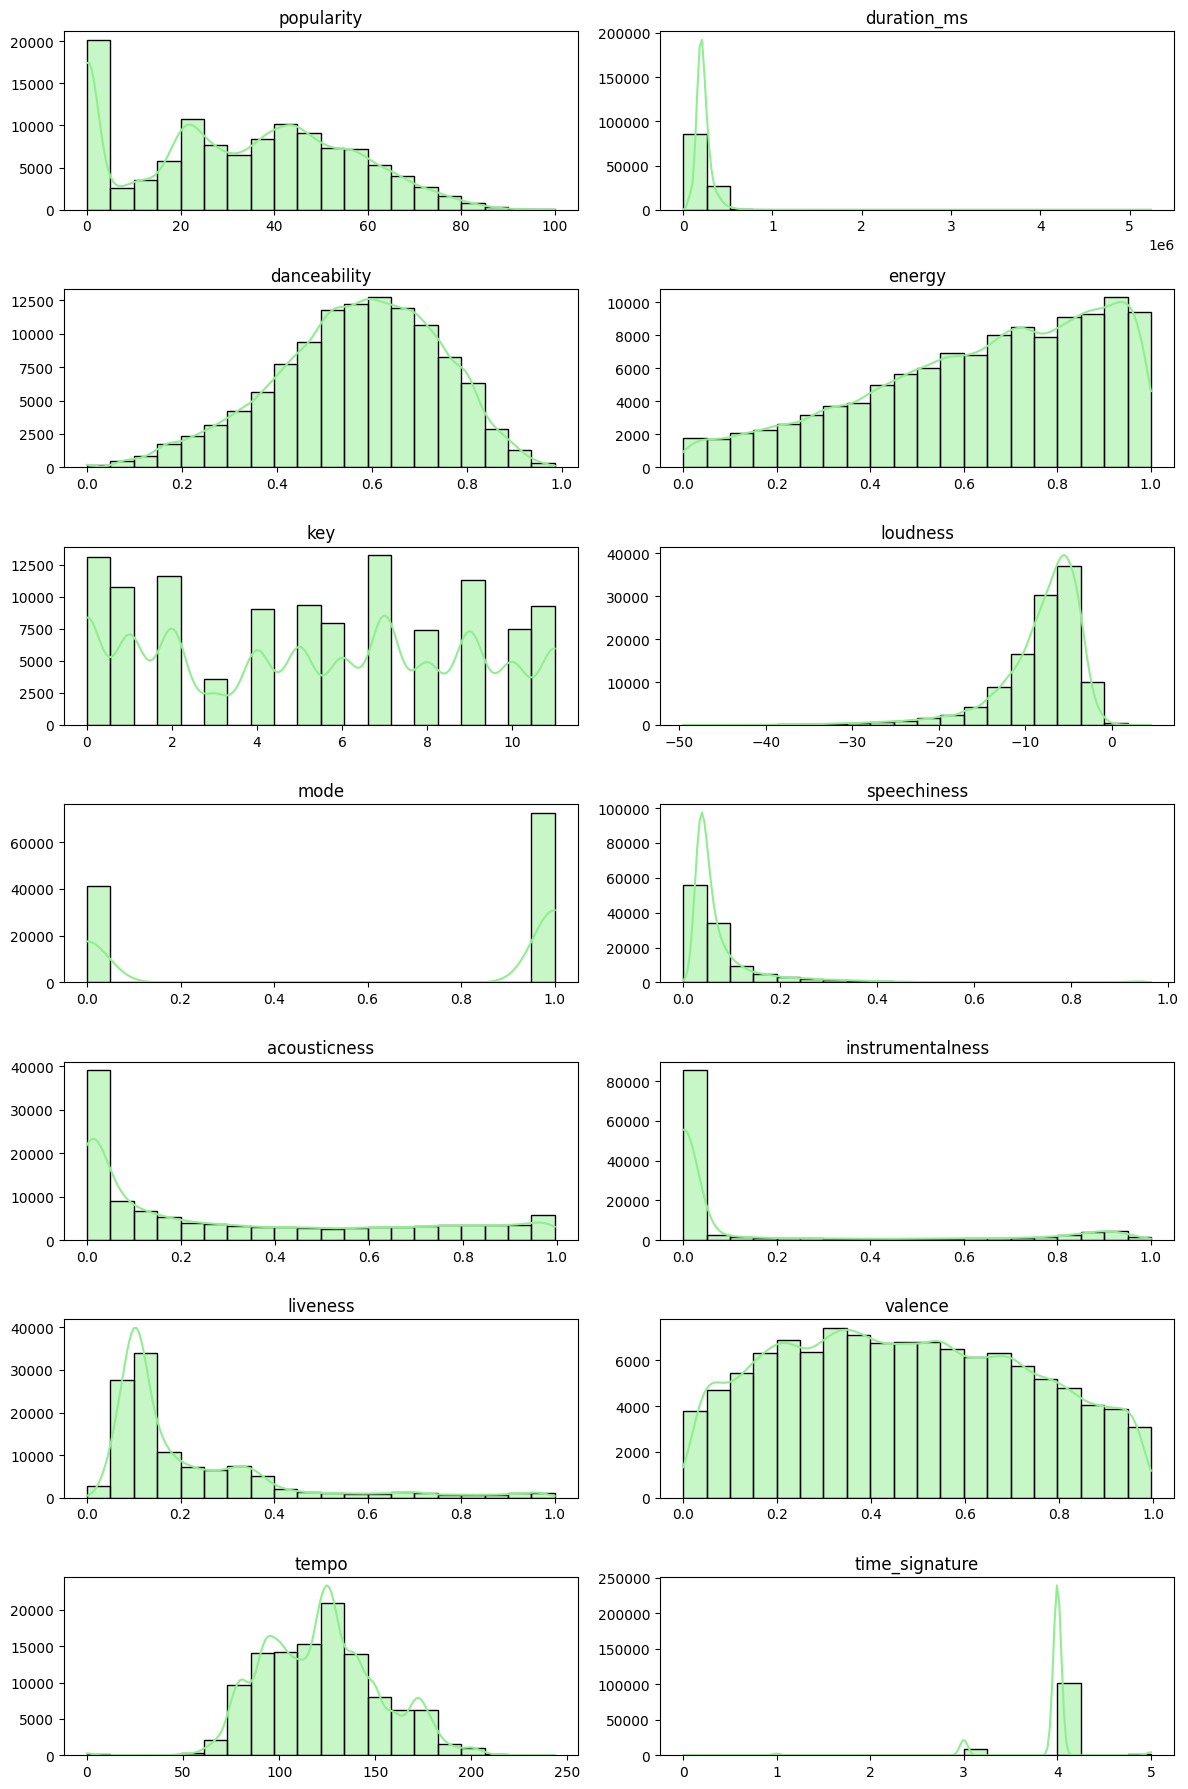

In [26]:
quantitative = df.select_dtypes(include=['int64', 'float64'])
n_cols = len(quantitative.columns)

fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(12, 18))

axes = axes.flatten()

for i, (ax, column) in enumerate(zip(axes, quantitative.columns)):
    sns.histplot(quantitative[column], kde=True, bins=20, ax=ax, color='lightgreen')
    ax.set_title(f'{column}')
    ax.set_xlabel('')
    ax.set_ylabel('')
    
plt.tight_layout()
plt.show()

### Outliers

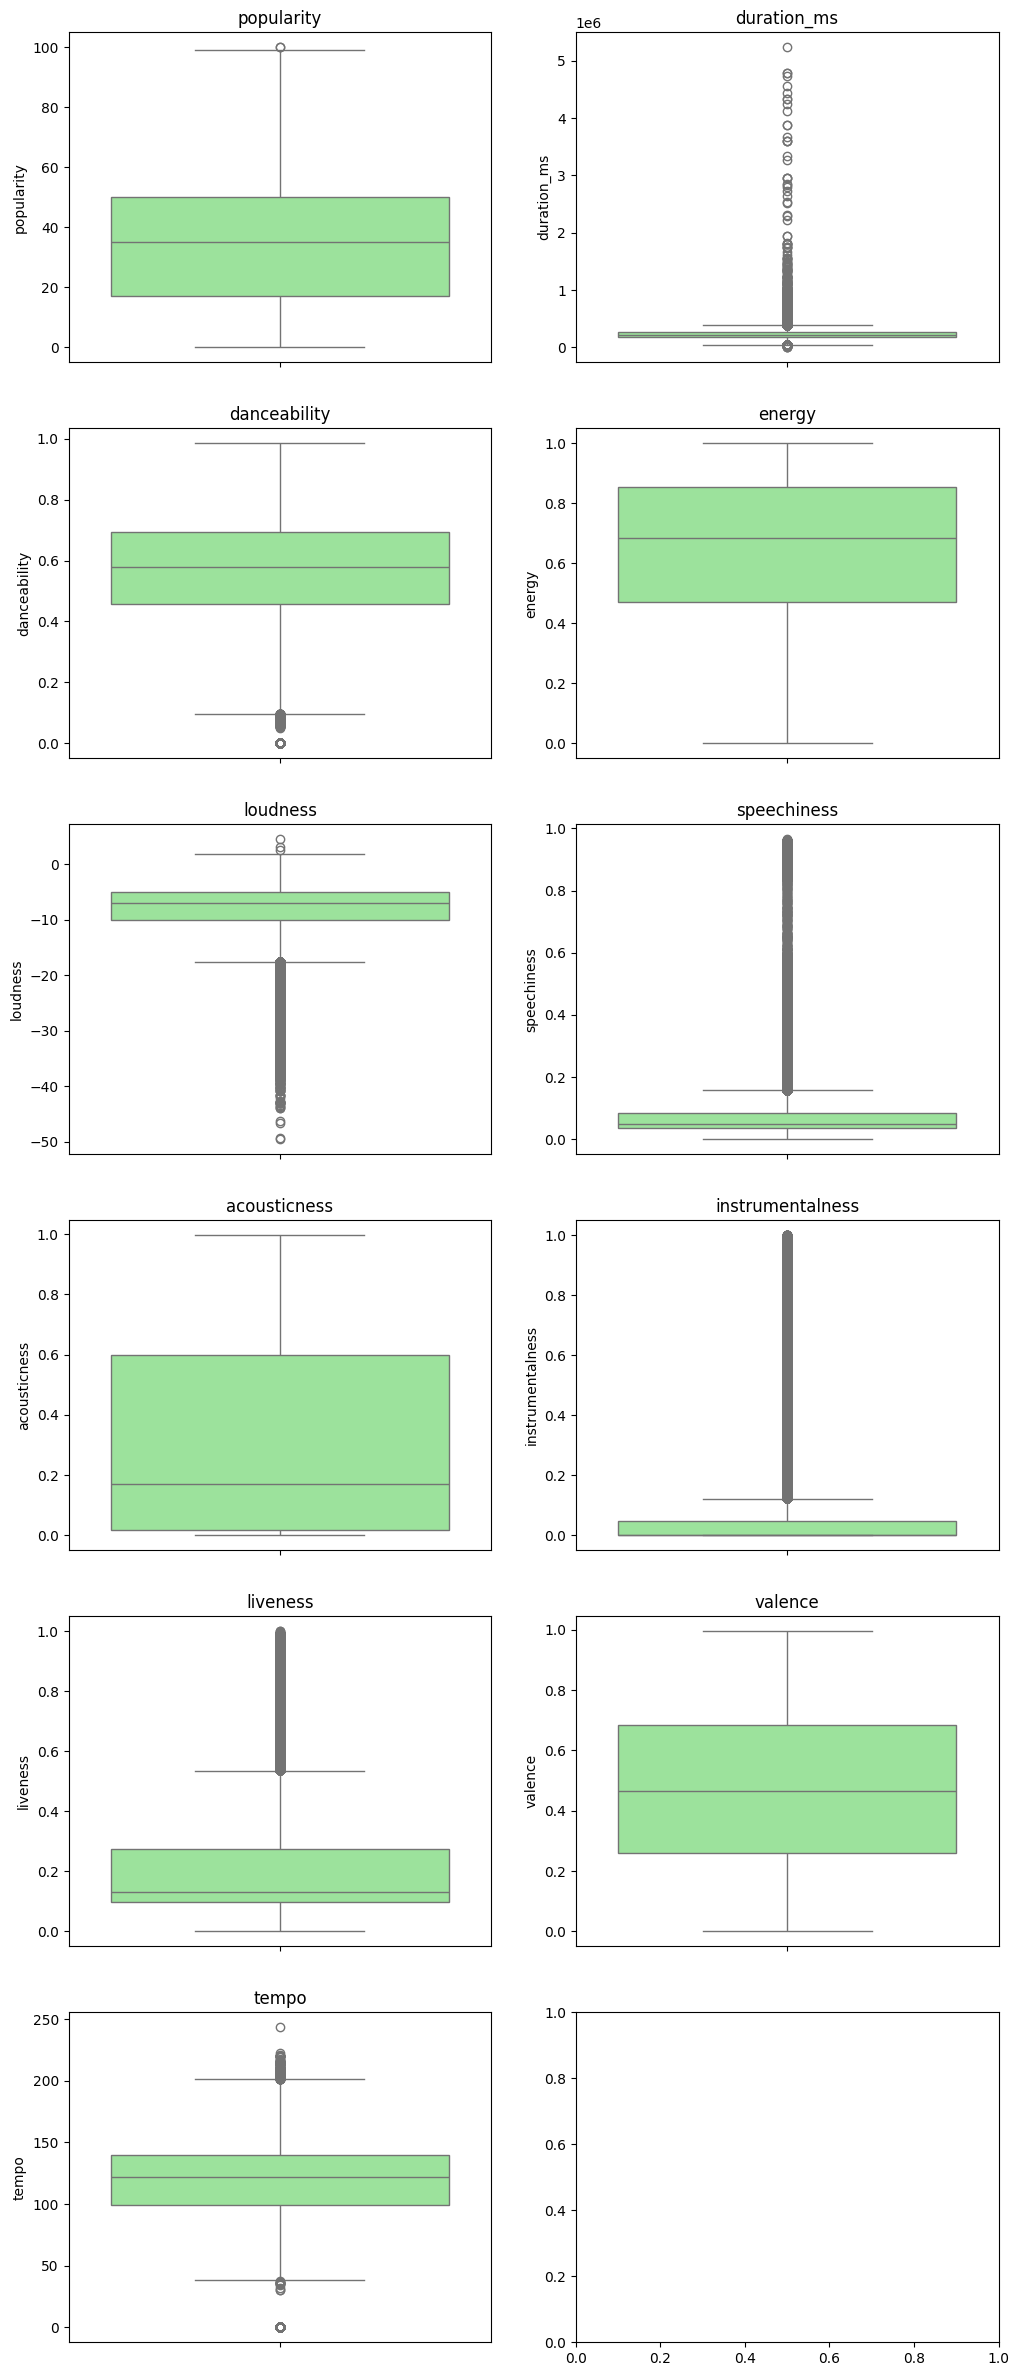

In [29]:
quantitative = df.select_dtypes(include=['int64', 'float64'])

columns_to_plot = quantitative.drop(columns=['time_signature', 'key', 'mode'], errors='ignore')

fig, axes = plt.subplots(nrows= 6, ncols=2, figsize=(12, 30))

for ax, column in zip(axes.flatten(), columns_to_plot.columns):
    sns.boxplot(y=df[column], ax=ax, color='lightgreen')
    ax.set_title(column)

plt.show()

## Data Correlation

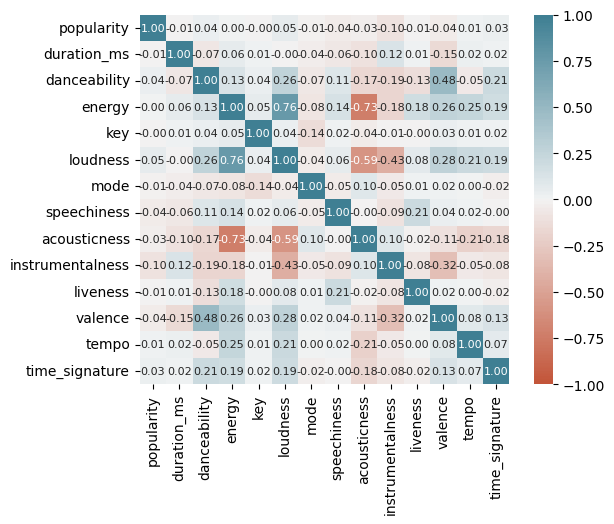

In [30]:
correlation= df.select_dtypes(include=[float, int]).corr()

ax = sns.heatmap(
    correlation,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    fmt='.2f',
    annot_kws={"size": 8}
)

## Data Patterns

En este caso, veremos los 10 datos más frecuentes.

C:\Users\carol\AppData\Local\Temp\ipykernel_13480\3672903055.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 1].set_xticklabels(top_albums.index, ha='right')


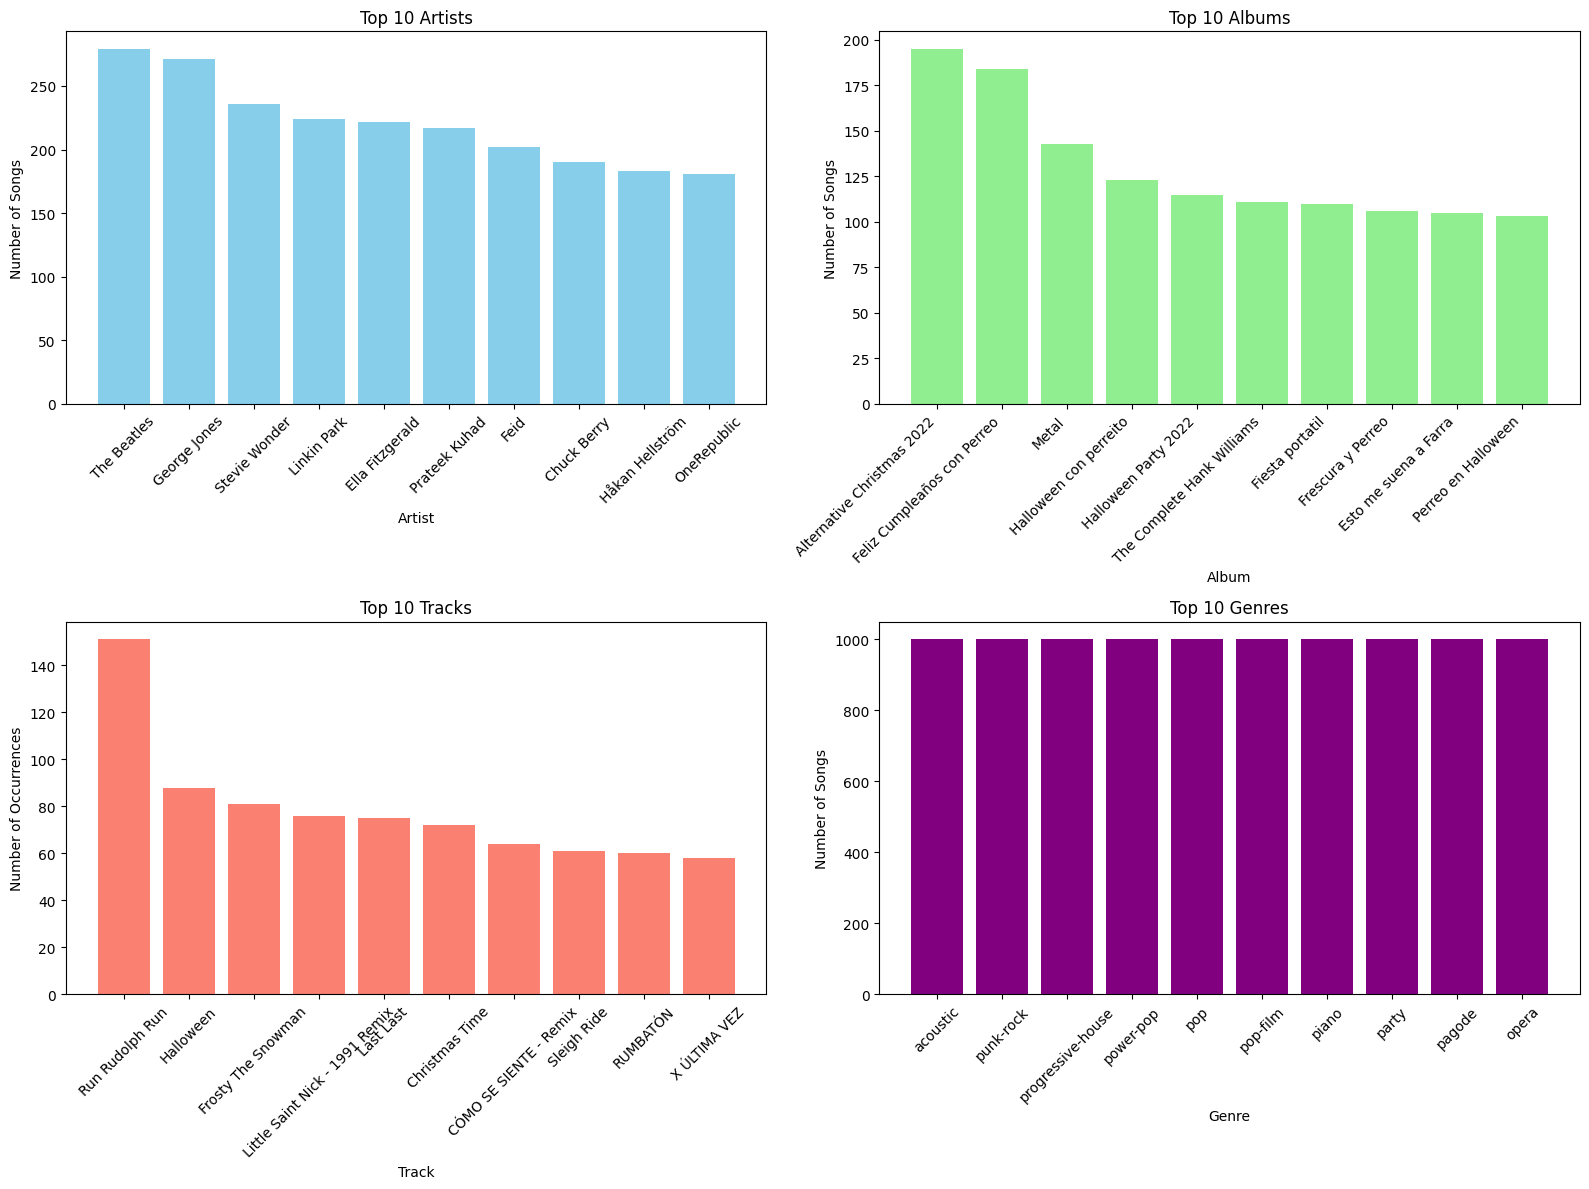

In [18]:
top_artists = df['artists'].value_counts().head(10)
top_albums = df['album_name'].value_counts().head(10)
top_tracks = df['track_name'].value_counts().head(10)
top_genres = df['track_genre'].value_counts().head(10)

fig, axs = plt.subplots(2, 2, figsize=(16, 12))

axs[0, 0].bar(top_artists.index, top_artists.values, color='skyblue')
axs[0, 0].set_title('Top 10 Artists')
axs[0, 0].set_xlabel('Artist')
axs[0, 0].set_ylabel('Number of Songs')
axs[0, 0].tick_params(axis='x', rotation=45)

axs[0, 1].bar(top_albums.index, top_albums.values, color='lightgreen')
axs[0, 1].set_title('Top 10 Albums')
axs[0, 1].set_xlabel('Album')
axs[0, 1].set_ylabel('Number of Songs')
axs[0, 1].tick_params(axis='x', rotation=45)
axs[0, 1].set_xticklabels(top_albums.index, ha='right')

axs[1, 0].bar(top_tracks.index, top_tracks.values, color='salmon')
axs[1, 0].set_title('Top 10 Tracks')
axs[1, 0].set_xlabel('Track')
axs[1, 0].set_ylabel('Number of Occurrences')
axs[1, 0].tick_params(axis='x', rotation=45)

axs[1, 1].bar(top_genres.index, top_genres.values, color='purple')
axs[1, 1].set_title('Top 10 Genres')
axs[1, 1].set_xlabel('Genre')
axs[1, 1].set_ylabel('Number of Songs')
axs[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

El anterior gráfico nos ha mostrado algo curioso, que nos indica que necesitamos hacer una transformación. En nuestro top 10 tracks, vemos que hay canciones que incluso se repiten con bastante frecuencia, si miramos esto más a detalle.

Sabemos que hay canciones que pueden tener el mismo nombre pero ser de distintos artistas, pero ese no es nuestro caso.




In [19]:
df[df['track_name'] == 'Run Rudolph Run']

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
8163,8163,1S4rxDloMtAduogKeiJZmR,Chuck Berry,CHRISTMAS TOP HITS 2022,Run Rudolph Run,0,162897,False,0.647,0.876,...,-5.662,1,0.1850,0.881,0.000036,0.2600,0.949,151.925,4,blues
8164,8164,03MW3H9B2P7tgpvzG3klNI,Chuck Berry,pov: you hear the bells jingle,Run Rudolph Run,0,162897,False,0.647,0.876,...,-5.662,1,0.1850,0.881,0.000036,0.2600,0.949,151.925,4,blues
8165,8165,52MCmoSCtPRbVN5Njdo6G5,Chuck Berry,Weihnachten Playlist,Run Rudolph Run,0,162897,False,0.647,0.876,...,-5.662,1,0.1850,0.881,0.000036,0.2600,0.949,151.925,4,blues
8166,8166,7m4luTtlene5vS6xUvWxRt,Chuck Berry,Holidays Are Coming,Run Rudolph Run,0,162897,False,0.647,0.876,...,-5.662,1,0.1850,0.881,0.000036,0.2600,0.949,151.925,4,blues
8168,8168,3RXAcz7Sa6JDZSxcH1EEQ6,Chuck Berry,Best Christmas Songs 2022 | For under the Mist...,Run Rudolph Run,1,162897,False,0.647,0.876,...,-5.662,1,0.1850,0.881,0.000036,0.2600,0.949,151.925,4,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92043,92043,3iyTXUFlm1YrquUUgXlPM1,Chuck Berry,All I want For Christmas Is Music,Run Rudolph Run,0,162897,False,0.647,0.876,...,-5.662,1,0.1850,0.881,0.000036,0.2600,0.949,151.925,4,rockabilly
92044,92044,0XgmLT6nDInA6w2yxpVsZh,Chuck Berry,Rockin' Around The Christmas Tree 2022,Run Rudolph Run,0,162897,False,0.647,0.876,...,-5.662,1,0.1850,0.881,0.000036,0.2600,0.949,151.925,4,rockabilly
92046,92046,4vJrtcgQoULwkPyFkXNYCx,Chuck Berry,pov: you bake cookies,Run Rudolph Run,0,162897,False,0.647,0.876,...,-5.662,1,0.1850,0.881,0.000036,0.2600,0.949,151.925,4,rockabilly
92049,92049,3IUpuyEMIgt4GvEZ2TqERF,Chuck Berry,Jingle Bell Rock 2022,Run Rudolph Run,0,162897,False,0.647,0.876,...,-5.662,1,0.1850,0.881,0.000036,0.2600,0.949,151.925,4,rockabilly


Este dataset nos da la misma canción en distintos playlists/albumes de Spotify, pero he decidido solamente dejar el album con más popularidad, ya que para el análisis que haré no va a ser necesario tener todos esos registros. En algunos casos el album original de la canción suele ser el más popular (si es que dicho album está en spotify), además que los datos de la canción en el album más popular suelen acercarse más a los de la canción original.

In [20]:
df_max_popularity = df.loc[df.groupby(['track_name', 'artists'])['popularity'].idxmax()].reset_index(drop=True)

track_ids_to_keep = df_max_popularity[['track_name', 'artists', 'track_id']].drop_duplicates()

df = df.merge(track_ids_to_keep, on=['track_name', 'artists', 'track_id'])

In [21]:
df[df['track_name'] == 'Run Rudolph Run']

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
80577,92818,2pnPe4pJtq7689i5ydzvJJ,Chuck Berry,Rock 'N' Roll Rarities,Run Rudolph Run,59,165733,False,0.681,0.715,...,-10.609,0,0.0912,0.812,0.000009,0.0777,0.957,152.132,4,rockabilly


Por ejemplo, Bad Guy de Billie Eilish tenía una situación similar a Run Rudolph Run y estaba en varios albumes. Ahora sale el album original de la canción, el cual es "When We All Fall Asleep, Where Do We Go?"

In [27]:
df[(df['track_name'] == 'Bad Guy') & (df['artists'] == 'Billie Eilish')]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
27324,31018,2Fxmhks0bxGSBdJ92vM42m,Billie Eilish,"When We All Fall Asleep, Where Do We Go?",Bad Guy,84,194087,False,0.701,0.425,...,-10.965,1,0.375,0.328,0.13,0.1,0.562,135.128,4,Electro


## Data Visualization

C:\Users\carol\AppData\Local\Temp\ipykernel_13480\524598770.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_popular, x='popularity', y='track_name', palette='viridis')


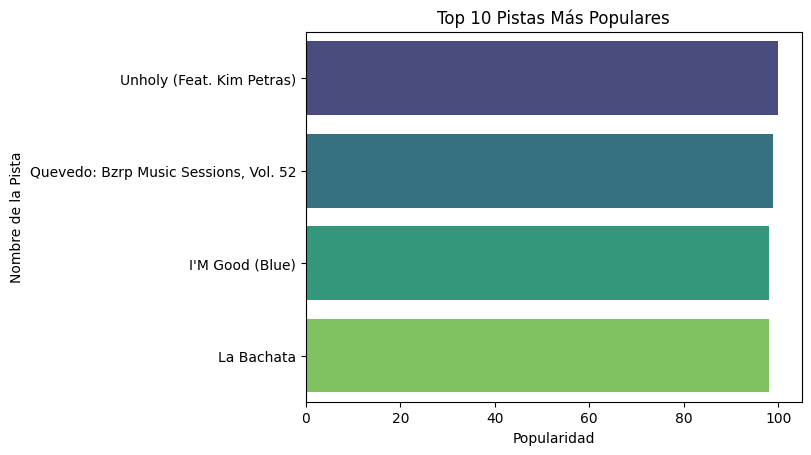

In [31]:
top_10_popular = df.nlargest(10, 'popularity')
sns.barplot(data=top_10_popular, x='popularity', y='track_name', palette='viridis')
plt.title('Top 10 Pistas Más Populares')
plt.xlabel('Popularidad')
plt.ylabel('Nombre de la Pista')
plt.show()

C:\Users\carol\AppData\Local\Temp\ipykernel_13480\1300380560.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.index, y=top_artists.values, palette='viridis')


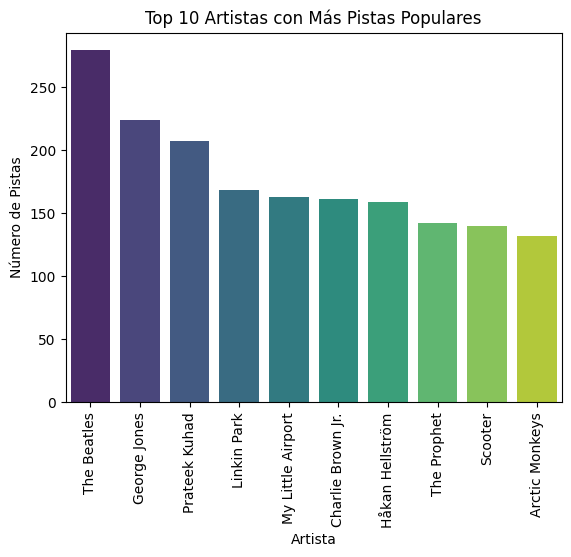

In [32]:
top_artists = df['artists'].value_counts().head(10)
sns.barplot(x=top_artists.index, y=top_artists.values, palette='viridis')
plt.title('Top 10 Artistas con Más Pistas Populares')
plt.xlabel('Artista')
plt.ylabel('Número de Pistas')
plt.xticks(rotation=90)
plt.show()

C:\Users\carol\AppData\Local\Temp\ipykernel_13480\3979944386.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_popularity.index, y=genre_popularity.values, palette='viridis')


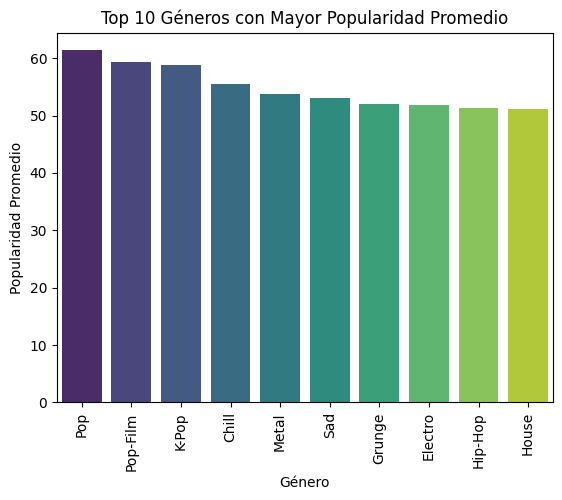

In [33]:
genre_popularity = df.groupby('track_genre')['popularity'].mean().nlargest(10)
sns.barplot(x=genre_popularity.index, y=genre_popularity.values, palette='viridis')
plt.title('Top 10 Géneros con Mayor Popularidad Promedio')
plt.xlabel('Género')
plt.ylabel('Popularidad Promedio')
plt.xticks(rotation=90)
plt.show()

C:\Users\carol\AppData\Local\Temp\ipykernel_13480\276319766.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_albums.index, y=top_albums.values, palette='viridis')


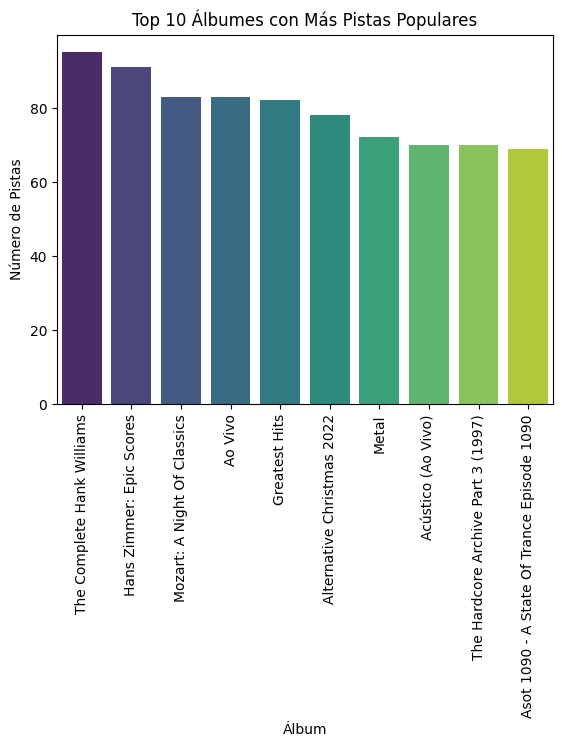

In [35]:
top_albums = df['album_name'].value_counts().head(10)
sns.barplot(x=top_albums.index, y=top_albums.values, palette='viridis')
plt.title('Top 10 Álbumes con Más Pistas Populares')
plt.xlabel('Álbum')
plt.ylabel('Número de Pistas')
plt.xticks(rotation=90)
plt.show()

C:\Users\carol\AppData\Local\Temp\ipykernel_13480\1353791853.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_genres_explicit_df, x='track_genre', y='explicit_percentage', palette='viridis')


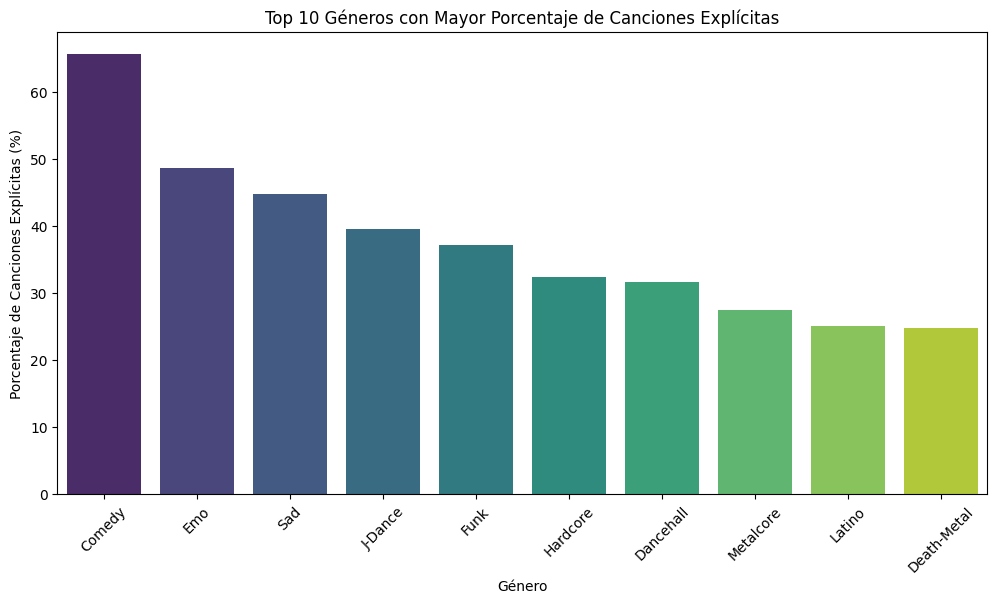

In [44]:
genre_explicit_percentage = df.groupby('track_genre')['explicit'].mean() * 100
top_10_genres_explicit = genre_explicit_percentage.sort_values(ascending=False).head(10)

top_10_genres_explicit_df = top_10_genres_explicit.reset_index()
top_10_genres_explicit_df.columns = ['track_genre', 'explicit_percentage']

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_genres_explicit_df, x='track_genre', y='explicit_percentage', palette='viridis')
plt.title('Top 10 Géneros con Mayor Porcentaje de Canciones Explícitas')
plt.xlabel('Género')
plt.ylabel('Porcentaje de Canciones Explícitas (%)')
plt.xticks(rotation=45)
plt.show()